<h1>Data Engineering Test<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file using Panadas 
Data = pd.read_csv('stayforlong_bookings.csv') 

#copy to new DataFrame to avoid modification on the orginal file
df = Data.copy()

#display the top 5 values to look at the data
df.head()

,hotel,is_canceled,booking_to_arrival_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,parking_lot,total_of_special_requests,reservation_status,reservation_status_date
0,Apartment,0,277,2015,October,41,6,2,5,2,...,No Deposit,273.0,NaN,0,Transient-Party,77.29,0,0,Check-Out,2015-10-13
1,Hotel,1,109,2016,February,9,21,2,1,2,...,Non Refund,19.0,NaN,44,Transient,75.00,0,0,Canceled,2015-12-18
2,Hotel,0,102,2015,October,42,16,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.00,0,0,Check-Out,2015-10-18
3,Apartment,1,35,2017,April,15,13,1,3,2,...,No Deposit,240.0,NaN,0,Transient,162.00,0,0,Canceled,2017-03-09
4,Hotel,1,164,2017,June,24,14,0,3,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,0,Canceled,2017-06-12


In [3]:
##check if the dataset contains a None values

df.isnull().values.any() #retured True so further checking required 

#calculte the number of nun value
df.isnull().sum().sort_values()






hotel                                  0
total_of_special_requests              0
parking_lot                            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
acquisition_channel                    0
reservation_status_date                0
board                                  0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

In [4]:
#check the data types to know the types of the date before remove the nan and change the data types

df.dtypes

hotel                              object
is_canceled                         int64
booking_to_arrival_time             int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
board                              object
country                            object
market_segment                     object
acquisition_channel                object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
#missing values from children, comapny, agent (data types float64) country (data types object)

#fill nan values with float values 0.0 for children filed
df['children'] = df['children'].fillna(0.0)


#fill nan values for comapny, agent, country
df[['company', 'agent', 'country']] = df[['company', 'agent', 'country']].fillna('NULL')

#double check if the nan values remove and the dataset ready for further check
df.isnull().sum().sort_values()

df.isnull().values.any()


False

In [6]:
df_guest_orgin = df.copy()

<h2>What are the most popular guest origin countries? <h2>

In [7]:
#sort the data and group based on the country name to check what are the most popular guest orgin countries
country = df_guest_orgin.groupby(['country']).size().reset_index(name='counts').sort_values(ascending=False, by=['counts']) #.reset_index(name='count').sort_values(ascending=False, by=['count'])

# Display the first 10 values to confirm it with the data
country = country[:10]

print("The most popluar guest orgin are from:")

country


The most popluar guest orgin are from:


,country,counts
147,SOM,48590
160,TON,12129
63,GMB,10415
174,WLF,8568
44,DEU,7287
79,ITA,3766
35,COK,3375
15,BEL,2342
25,BRA,2224
121,NLD,2104


<AxesSubplot:ylabel='country'>

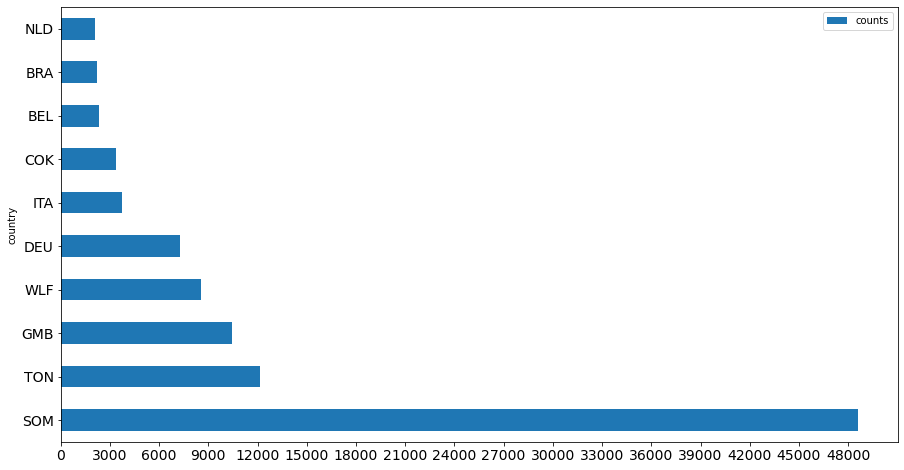

In [8]:
#set the country name as a index to have a better gragh and display the data on gragh
country = country.set_index('country')


country.plot(kind="barh", fontsize=14, figsize=(15,8), xticks= range(0,  50000, 3000))

In [9]:
print('From both booking confirmed and canceled. The most popoulr guest country are \n {}\n{}'.format(country.values[:10], country.index[:10]))

#saving the output to first.parquest format
country.to_parquet('first.parquet')


From both booking confirmed and canceled. The most popoulr guest country are 
 [[48590]
 [12129]
 [10415]
 [ 8568]
 [ 7287]
 [ 3766]
 [ 3375]
 [ 2342]
 [ 2224]
 [ 2104]]
Index(['SOM', 'TON', 'GMB', 'WLF', 'DEU', 'ITA', 'COK', 'BEL', 'BRA', 'NLD'], dtype='object', name='country')


In [10]:
# filtering the data by removing the canceled booking in cas

country_without_canceltion = df_guest_orgin[df_guest_orgin['is_canceled'] == 1 ]

country_without_canceltion_sorted = country_without_canceltion.groupby(['country']).size().sort_values(ascending=False)

print("After removing the canceled booking. The most popoular countries are ")
country_without_canceltion_sorted.head(10)

After removing the canceled booking. The most popoular countries are 


country
SOM    27519
TON     2453
WLF     2177
GMB     1934
ITA     1333
DEU     1218
COK      832
BRA      830
VUT      501
BEL      474
dtype: int64

<h2>What is the room price per night?<h2>

In [11]:
#adr: Booking cost divided by the number of nights. (Average Daily Rate) adr = booking cost / number of nights

In [12]:
# Copy the data before changing the orgianl dataset

df_room_price = df.copy()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#slice data based on the question requirement

df_room_price = df_room_price[['hotel', 'adr', 'stays_in_weekend_nights', 
                               'stays_in_week_nights', 'arrival_date_month', 'arrival_date_year']]


#calculating the total number of night by adding both nights with weekdays and weekend

df_room_price['num_of_nights'] = df_room_price['stays_in_weekend_nights'] + df_room_price['stays_in_week_nights']

#calculting the total price per night

df_room_price['total_price'] = df_room_price['num_of_nights'] * df_room_price['adr']

#sort the data to have better gragh presentation:

df_room_price.index = pd.CategoricalIndex(df_room_price['arrival_date_month'], categories=months, ordered=True)

df_room_price = df_room_price.sort_index().reset_index(drop=True)

#display the data after modification

df_room_price


,hotel,adr,stays_in_weekend_nights,stays_in_week_nights,arrival_date_month,arrival_date_year,num_of_nights,total_price
0,Hotel,64.00,1,0,January,2016,1,64.00
1,Hotel,75.00,0,1,January,2017,1,75.00
2,Apartment,36.00,0,1,January,2017,1,36.00
3,Apartment,34.00,0,3,January,2017,3,102.00
4,Apartment,68.00,0,1,January,2017,1,68.00
...,...,...,...,...,...,...,...,...
119385,Apartment,84.00,1,2,December,2016,3,252.00
119386,Apartment,47.57,8,20,December,2016,28,1331.96
119387,Hotel,89.00,4,10,December,2016,14,1246.00
119388,Hotel,0.00,0,2,December,2015,2,0.00


In [13]:
df_room_price = df_room_price

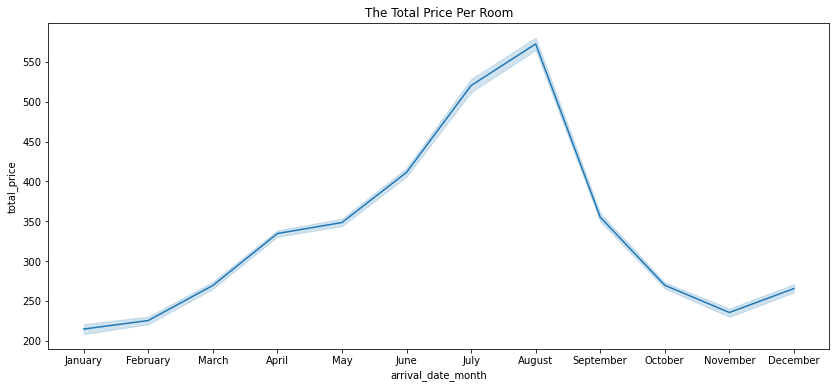

In [14]:
plt.figure(figsize=(14,6))
sns.lineplot(x='arrival_date_month', y='total_price', data= df_room_price).set_title('The Total Price Per Room')
plt.show()

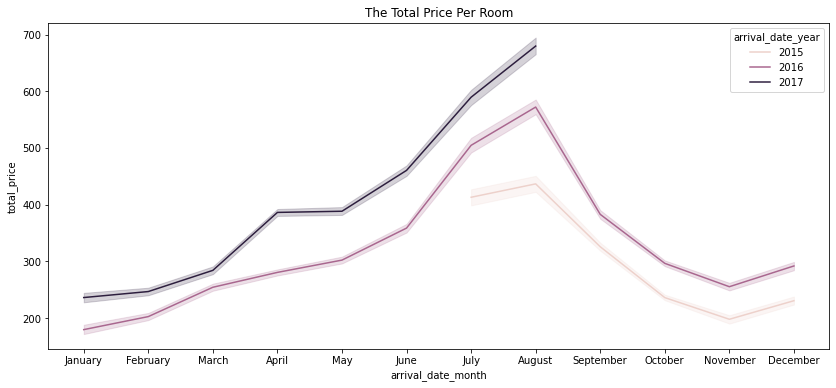

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(x='arrival_date_month', y='total_price', data= df_room_price, hue='arrival_date_year').set_title('The Total Price Per Room')
plt.show()

In [21]:
# Double check the data from the graph and numberic data

#manul checking to confirm the graph data, the data for 2015 only from July to Decemebr, for 2017 from Jan until Auguest

#filter based on year 2015, 2016 and 2017

df_checking = df_room_price[df_room_price['arrival_date_year'] == 2017]

#more checking
df_checking = df_checking[df_checking['arrival_date_month'] == 'September']

#Display the data after filiter ing and the graph is correct. no data for 2017 and 2015 
df_checking


,hotel,adr,stays_in_weekend_nights,stays_in_week_nights,arrival_date_month,arrival_date_year,num_of_nights,total_price


In [22]:
#df_room_price_per_night = df[df['adr' , 'stays_in_weekend_nights']]


df_room_price['room_price_per_night'] = df_room_price['adr'] / (df_room_price['stays_in_weekend_nights'] + df_room_price['stays_in_week_nights'])


df_room_price['room_price_per_night'].min()


-0.638

<h2>How does the previous price vary throughout the year?<h2>

In [23]:
# calcluate the rataion and price different yearly

In [24]:
#copy the data
df_price_vary = df.copy()

#study the data for 2015
avg_2015 = df_price_vary[df_price_vary['arrival_date_year'] == 2015]

#describe the data to have a general idea how the ADR
avg_2015['adr'].describe()

count    21996.000000
mean        87.178515
std         42.748795
min          0.000000
25%         62.000000
50%         77.760000
75%        108.000000
max        508.000000
Name: adr, dtype: float64

In [25]:
avg_2016 = df_price_vary[df_price_vary['arrival_date_year'] == 2016]
avg_2016['adr'].describe()

count    56707.000000
mean        98.325863
std         49.955696
min          0.000000
25%         68.530000
50%         90.950000
75%        120.000000
max       5400.000000
Name: adr, dtype: float64

In [26]:
avg_2017 = df_price_vary[df_price_vary['arrival_date_year'] == 2017]
avg_2017['adr'].describe()

count    40687.000000
mean       114.637950
std         52.256304
min         -6.380000
25%         80.000000
50%        107.100000
75%        140.000000
max        510.000000
Name: adr, dtype: float64

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

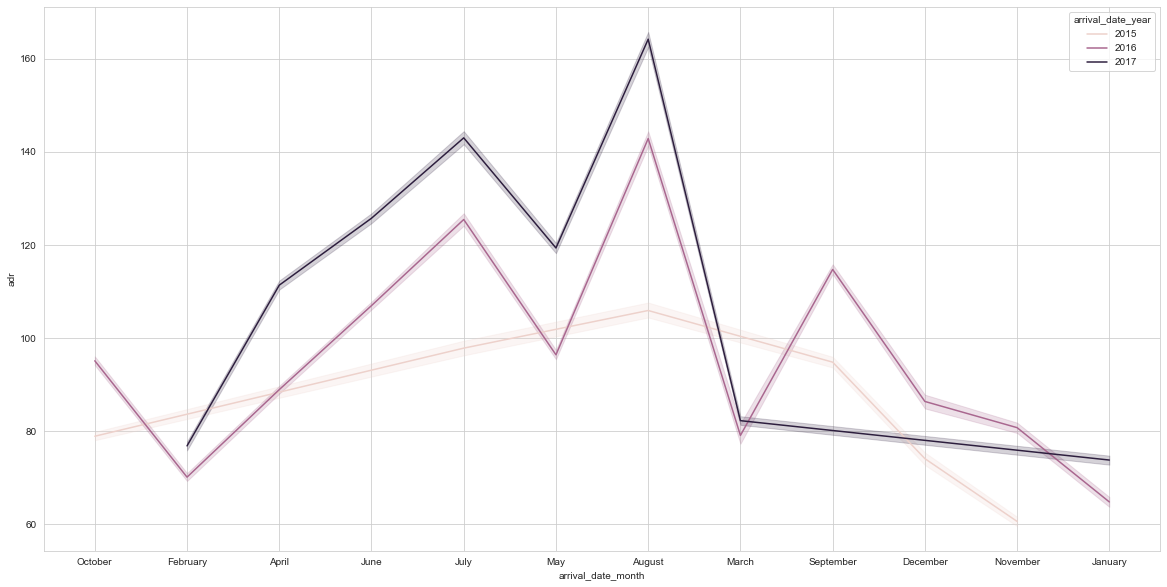

In [27]:

#avg_2015 = avg_2015[['adr', 'arrival_date_year', 'arrival_date_month']].sort_values(ascending=False, by='arrival_date_month') #.reindex('arrival_date_month')
#avg_2015.head(10)
plt.figure(figsize=(20,10))
sns.lineplot(x='arrival_date_month', y='adr', data= df_price_vary, hue='arrival_date_year')
#plt.show()

In [28]:
df_room_price

,hotel,adr,stays_in_weekend_nights,stays_in_week_nights,arrival_date_month,arrival_date_year,num_of_nights,total_price,room_price_per_night
0,Hotel,64.00,1,0,January,2016,1,64.00,64.000000
1,Hotel,75.00,0,1,January,2017,1,75.00,75.000000
2,Apartment,36.00,0,1,January,2017,1,36.00,36.000000
3,Apartment,34.00,0,3,January,2017,3,102.00,11.333333
4,Apartment,68.00,0,1,January,2017,1,68.00,68.000000
...,...,...,...,...,...,...,...,...,...
119385,Apartment,84.00,1,2,December,2016,3,252.00,28.000000
119386,Apartment,47.57,8,20,December,2016,28,1331.96,1.698929
119387,Hotel,89.00,4,10,December,2016,14,1246.00,6.357143
119388,Hotel,0.00,0,2,December,2015,2,0.00,0.000000


<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

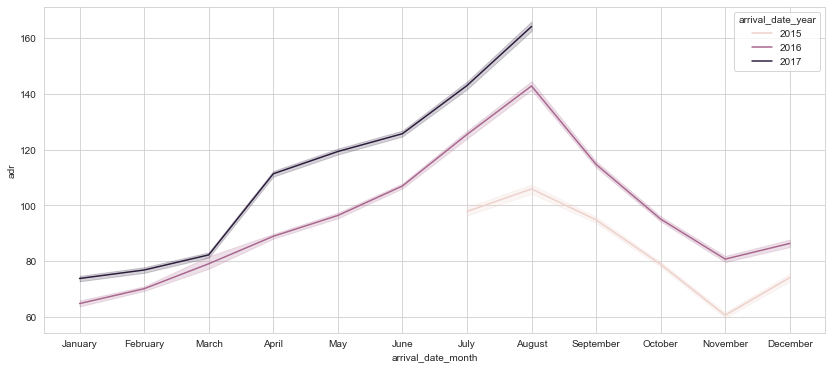

In [29]:
plt.figure(figsize=(14,6))
sns.lineplot(x='arrival_date_month', y='adr', data= df_room_price, hue='arrival_date_year')

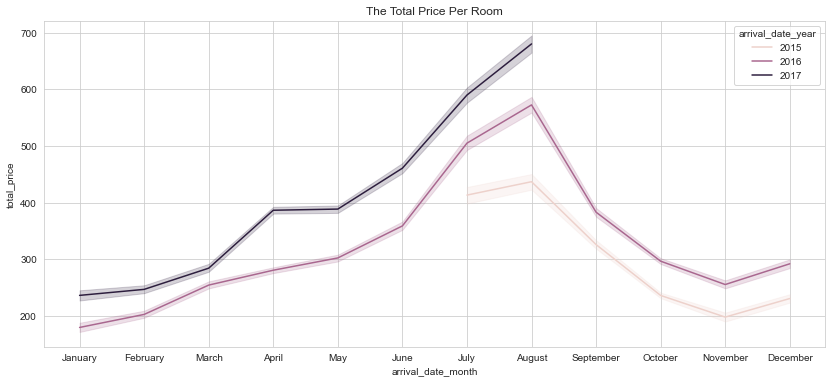

In [30]:
plt.figure(figsize=(14,6))
sns.lineplot(x='arrival_date_month', y='total_price', data= df_room_price, hue='arrival_date_year').set_title('The Total Price Per Room')
plt.show()

<h2>What is the distribution of guests per month?<h2>

In [31]:
# where are the guests locatated monthly , in which hotel are mostly, arrival_date_month is unique 

In [32]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#sort the values based on months
dist_of_guest = df['arrival_date_month'].value_counts().reindex(months)

#display the data
dist_of_guest


January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: arrival_date_month, dtype: int64

<AxesSubplot:title={'center':'Distribution of the Guest per Month'}, xlabel='Guest Distribution', ylabel='Months'>

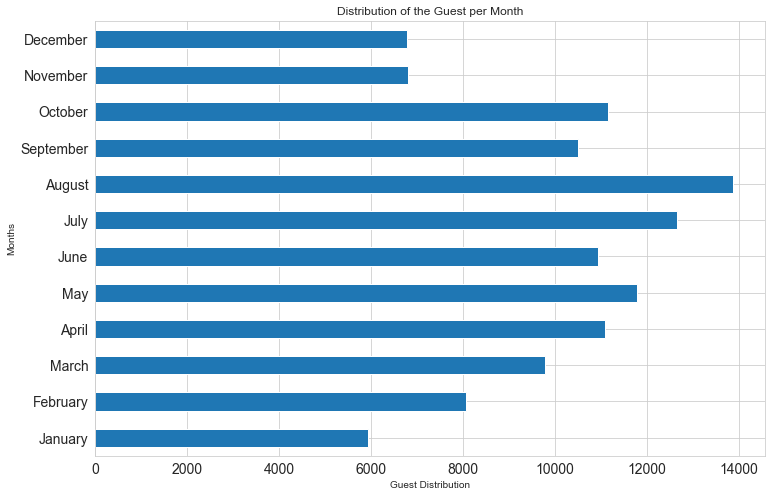

In [33]:
#Display the data on Graph 

df2= dist_of_guest.copy()

plt.title('Distribution of the Guest per Month')
plt.xlabel('Guest Distribution')
plt.ylabel('Months')
df2.plot(kind="barh", fontsize=14, figsize=(12,8))



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


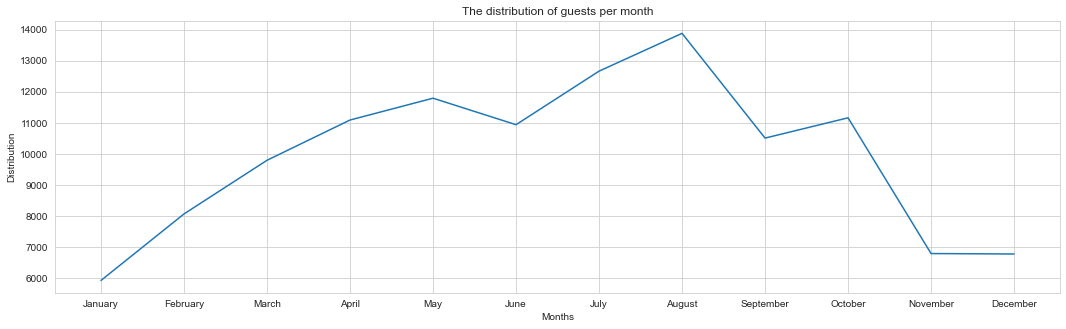

In [34]:
#Display the data on different types of graph

x = df2.index

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("The distribution of guests per month")
ax.set_xlabel('Months')
ax.set_ylabel('Distribution')


y = dist_of_guest/dist_of_guest.sum()*100
sns.lineplot(x, dist_of_guest, ax=ax)

plt.show()



<h2>For how long do guests book their stays?<h2>

In [35]:
#calculting the total number of stay by combing all nights within the week

book_stays = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


df_guest_booking = book_stays.value_counts() #.to_dataframe()

df_guest_booking
data_frame = pd.DataFrame(data=df_guest_booking, columns=['night_number'])

data_frame




,night_number
2,27643
3,27076
1,21020
4,17383
7,8655
5,7784
6,3857
8,1161
10,1139
14,916


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The distribution of guests per month'}, xlabel='Number of Night', ylabel='Number of Booking'>

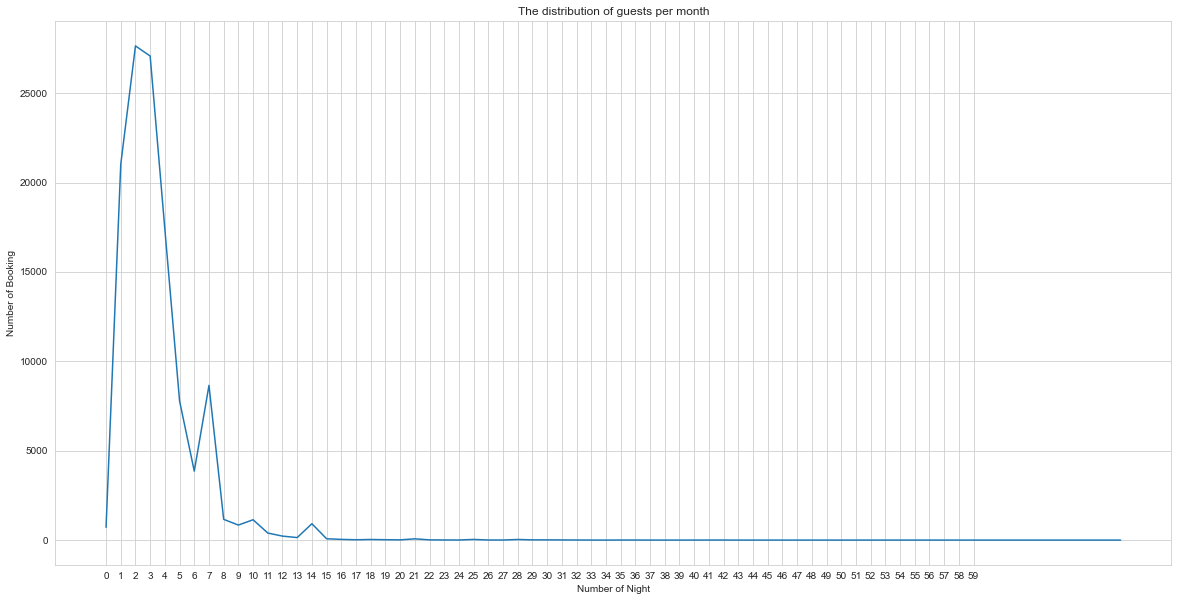

In [36]:
book_stays_counts = book_stays.value_counts()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("The distribution of guests per month")
ax.set_xlabel('Number of Night')
ax.set_ylabel('Number of Booking')
ax.set_xticks(range(0,  60, 1))
sns.lineplot(book_stays_counts.index,book_stays_counts, ax=ax)